In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def sigmoid(z):
    return 1/(1+np.exp(-z))

**Important Questions that need still answers/justification**

 - How does logistic regression handle categorical data?
 - How does it handle outliers?
 - When is it appropriate to use logistic regression over other models (is it speed?)
 - The less important questions at the bottom of this page.

# Logistic Regression

## 1. Top-level

### 1.1 High-level explanation

Logistic regression makes the explicit assumption that your data can be separated by a line or hyper-plane. Like linear regression, logistic regression is a linear model.

$$
\begin{align*}
y = f(x_i) &= \sigma(w^Tx+b) \\
&= \frac{1}{1+\exp\left\{ -(w^Tx+b) \right \}}
\end{align*}
$$

It is the internal term to $\sigma$ that gives logistic regression it's linear dependency. Although this terms looks like linear regression, $y=mw+b$, it's important to remember that what gives linear regression it's characteristics is the loss function, i.e. MSE. For logistic regression, we will define a new loss function to obtain the desired behavior.

It's first important to discuss the functionality of the sigmoid function, $\sigma$.

Consider the example below, of two Gaussian clouds located at (1,1) and (-1,-1):

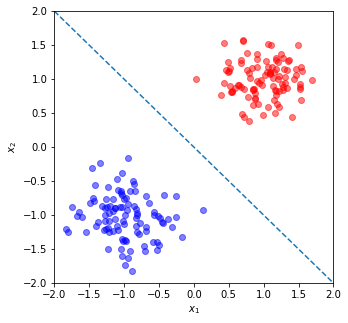

In [2]:
rx1, rx2 = np.random.randn(2,100)/3 + 1
bx1, bx2 = np.random.randn(2,100)/3 - 1 
plt.figure(figsize=(5,5))
plt.scatter(bx1, bx2, color='b', alpha=.5)
plt.scatter(rx1, rx2, color='r', alpha=.5)
plt.plot([-2,2], [2,-2], '--')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.show()

It should be obvious that the dividing line, $x_2=-x_1$, separates the two classes, but lets explore this mathematically without the sigmoid.

$$
f(x_1, x_2) = x_2 + x_1 = 0
$$

taking the point $(-1,-1)$

$$
\begin{align*}
f(-1,-1) &= -2 < 0 \\
\therefore (-1,-1) &= {\rm Blue}.
\end{align*}
$$

Whereas, the point (1,1):

$$
\begin{align*}
f(1,1) &= 2 > 0 \\
\therefore (1,1) &= {\rm Red}.
\end{align*}
$$

Now, the values 2 or -2 are not particularly illuminating. So we use the sigmoid function to squash the output into a probability, such that the output $y=0={\rm Blue}$ and $y=1={\rm Red}$. To put this graphically:

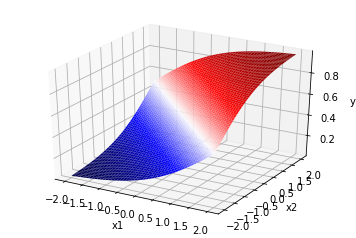

In [3]:
x = np.linspace(-2,2, 50)
X1, X2 = np.meshgrid(x, x)
y = sigmoid(X1 + X2)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, y, cmap='seismic')
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
plt.show()

### 1.2 What scenario should you use logistic regression?


### 1.3 What types of features does the model use?

#### 1.3.1 Linear dependence

Similar to linear regression, logistic regression is an appropriate choice when classifying data that is linearly separable. This either has to be assumed initially or constructed using sufficient domain knowledge. Consider the "donut" problem below:

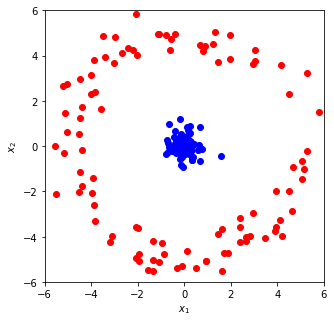

In [4]:
r1 = np.random.randn(100)/2
r2 = np.random.randn(100)/2+5
theta = 2*np.pi*np.random.randn(100)
bx1 = r1*np.cos(theta)
bx2 = r1*np.sin(theta)
rx1 = r2*np.cos(theta)
rx2 = r2*np.sin(theta)
plt.figure(figsize=(5,5))
plt.scatter(bx1,bx2, color='b')
plt.scatter(rx1,rx2, color='r')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.show()

This is not a linear classification problem - no straight line will separate these classes. However, similarly to the polynomial problem in my [notebook on linear regression](linear_regression.ipynb), we can add an extra dimension. such that 

$$
x_3 = \sqrt{x_2^2 + x_1^2}
$$ 

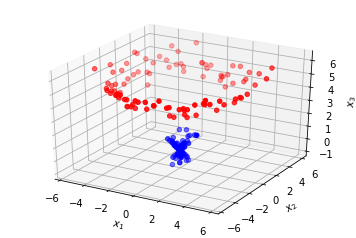

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(bx1,bx2, r1, color='b')
ax.scatter(rx1,rx2, r2, color='r')
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$x_3$")
plt.show()

These clusters can now be separated with a hyperplane in $x_1, x_2$-space, at $x_3 \approx 2$.

#### 1.3.2 Noisy Data



### 1.4 When the model breaks & what's a good backup?



## 2. A bit more detail

### 2.1 Normalization of data 

### 2.1 Loss function

The loss function for binary logistic regression is the *cross-entropy error*

$$
\mathcal{L} = - \left \{ t\log(y) + (1-t)\log(1-y) \right \}
$$

wherein $t$ is the target class, and $y$ is the class predicted by the model.

It can be helpful to notice that only one of these terms will matter at a time. For example given a target class of $t=0$ only the second term will matter, $-\log(1-y)$. Whereas if $t=1$ only the first term will matter, $-\log(y)$.

## 3. In-depth

### 3.1 Probabilistic interpretation 

#### 3.1.1 Understanding the loss function

Logistic regression operates on the fundamental assumption that the data falls into a binomial distribution, and each of the data points are independent from one-another. We describe this mathematically this using [Bayes' Law](naive_bayes.ipynb).

$$
P(y|X) = \frac{P(y) P(X|y)}{P(X)} 
$$

The term in this that we have control over is the likelihood, $P(X|y)$. We want to maximize this term during training, thereby maximizing the probability that a data point falls into the correct class, $P(y|X)$.

As stated above, we define the likelihood using a binomial distribution, and assume independence.

$$
\begin{align*}
P(X|y) &= P(x_1, x_2, \cdot, x_n | y) \\ 
&= \prod_{n}^{i} P(x_i|y) \\
&= \prod_{n}^{i} y_i^{t_i}(1-y_i)^{t_i}
\end{align*}
$$

Taking the negative log of this, to reduce the complexity of calculating exponents, renders the cross-entropy loss function. 

$$
- \log P(X|y) = \sum_i \left \{ t_i\log y_i + (1-t_i)\log (1-y_i) \right \}
$$

To summarize, logistic regression fundamentally assumes the data falls into a binomial distribution. And by **maximizing** the log of the likelihood (log-likelihood) we **minimizing** the cross-entropy. 


#### 3.1.2 Understanding connection to linear regression

We have been writing the logistic regression equation as $y=\sigma(w^Tx)$ but in actuality what we are describing the is *probability* that a data point is in a class, 0 or 1:

$$
\begin{align*}
P(y=1 | x) &= \sigma(w^Tx) \\
P(y=0 | x) &= 1 - \sigma(w^Tx)
\end{align*}
$$

We can also think about this in terms of: "what are the odds that data point $x_i$ falls into class 0 or class 1", in which case we take the ratio of these probabilities. 

$$
\begin{align*}
\frac{P(y=1|x)}{P(y=0|x)} &= \cfrac{\cfrac{1}{1+\exp(-w^Tx)}}{\cfrac{\exp(-w^Tx)}{1+\exp(-w^Tx)}} \\
&= \frac{1}{\exp(-w^Tx)} \\
&= \exp(w^Tx) \\
\end{align*}
$$

Taking the log of this equation we recover the a description of linear regression:

$$
\log \left ( \frac{P(y=1|x)}{P(y=0|x)} \right ) = w^Tx
$$

So, when we find the optimal decision boundary in logistic regression what we're actually doing is finding a best-fit-line that minimizes the log-odds, using linear regression.

### 3.2 Derivation of the analytic solution

A closed-form solution exists for logistic regression. It makes my head hurt. I'll try to add it later.

### 3.3 Gradient decent

**[Need to treat indices rigorously, and convert sum to matrix]**

As with most of these ML problems, we can use gradient decent to find the solution numerically.

$$
w \leftarrow w - \frac{d}{dw}\mathcal{L} 
$$

With our definition of loss being the cross-entropy, we find it's derivative w.r.t. the model weights using the chain rule:

$$
\frac{d}{dw}\mathcal{L} = \frac{d\mathcal{L}}{dy}\frac{dy}{dz}\frac{dz}{dw}
$$

where

$$
\begin{align*}
y &= \sigma(z) \\
z &= w^Tx \\ \\[5mm]
\end{align*}
$$

$$
\begin{align*}
\frac{d\mathcal{L}}{dy} &= -\frac{d}{dy} \sum \left \{ t\log(y) + (1-t)\log(1-y) \right \} \\ 
&= - t\frac{1}{y} - (1-t)\frac{1}{1-y} \\ \\[2mm]
\frac{dy}{dz} &= \frac{d}{dz} \frac{1}{1+\exp(-z)} \\
&= \frac{1}{1+\exp(-z)}\frac{\exp(-z)}{1+\exp(-z)} \\ 
&= y(1-y) \\ \\[2mm]
\frac{dz}{dw} &= \frac{d}{dw} w^Tx \\
&= x
\end{align*}
$$

Therefore,

$$
\begin{align*}
\frac{d}{dw}\mathcal{L} = (y-t)x
\end{align*}
$$

### 3.4 Simple Implementation


In [6]:
class LogisticRegression:
    
    def __init__(self, order):
        self.W = np.random.randn((order+1))
    
    def fit(self, X, Y, alpha=1e-1, epochs=1000):
        N, D = X.shape
        X = np.hstack((X, np.ones(shape=(N,1))))
                      
        for _ in range(epochs):
            Y_hat = self.perdict(X)
            dL = X.T.dot(Y_hat-Y)                #   X^T (Y_hat - Y)
            self.W -= alpha*dL                  
            
    def perdict(self, X):
        return sigmoid(X.dot(self.W))
    
    def coeff(self):
        return self.W.flatten()

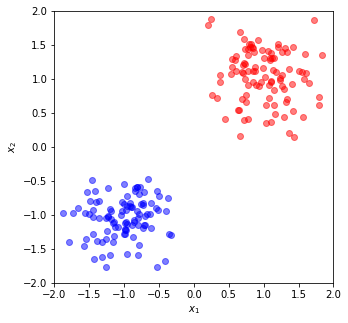

In [7]:
X = np.random.randn(200,2)/3
X[100:,:] += 1
X[:100,:] -= 1
Y = np.zeros(200)
Y[100:] = 1

plt.figure(figsize=(5,5))
plt.scatter(X[Y==0,0], X[Y==0,1], color='b', alpha=.5)
plt.scatter(X[Y==1,0], X[Y==1,1], color='r', alpha=.5)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.show()

In [8]:
lr = LogisticRegression(order=2)
lr.fit(X, Y)

The decision boundary is along: y=-1x+-0


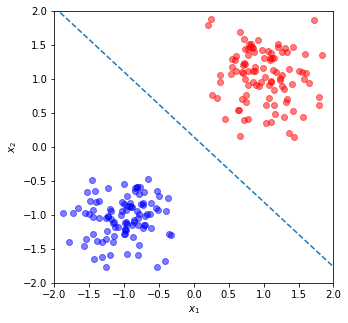

In [9]:
w1, w2, b = lr.coeff()
w = -w1/w2
b = (b-.5)/w2
print("The decision boundary is along: y={:.0f}x+{:.0f}".format(w, b))
x1 = np.linspace(-2,2,100)
x2 = w * x1 - b
plt.figure(figsize=(5,5))
plt.scatter(X[Y==0,0], X[Y==0,1], color='b', alpha=.5)
plt.scatter(X[Y==1,0], X[Y==1,1], color='r', alpha=.5)
plt.plot(x1, x2, '--')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.show()

## 4. TODO

#### 4.1 Top-level
- What is the high level version, explain in layman's terms
- What scenario should you use it in (classification vs regression, noisy data vs clean data)?
- How does this deal with outliers? Skewed data?
- What assumptions does the model make about the data? (Linear, etc)?
- What types of features does the model use (continuous vs categorical)?
- When does the model break / fail (adv & dis-advantages)?
- use cases / alternatives when it breaks

#### 4.2 A bit more detail:
- How do you normalize the data for the model, if you need to?
- How to initialize parameters at beginning (e.g. where to put centroid in KMeans)
- What's the loss function used (if many, what are tradeoffs of each)?
- What optimizers can you use here?
- What's the complexity — runtime, parameters?
- How does it scale with # of features or input data?

#### 4.3 In-depth
 - probabilistic interpretation
 - Derive the math (only for a couple models)
 - Code up implementation (only for a couple models)

#### 4.4 More on training the model (not model-specific, this should be common for most of the models):
- How to deal with imbalanced data?
- How well does it generalize to unseen data (over-fitting vs under-fitting)?
- What if you have MANY more features than sample points? Vice versa? (A variation of the above over/under fitting)
- How do you regularize the model? Tradeoffs?
- How can you validate the model?
- Does the model emphasize Type 1 or Type 2 errors?